In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; 
from sklearn.model_selection import train_test_split
from pylab import rcParams

from scipy import stats
from collections import Counter



# Machine Learning Libraries
import sklearn
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
# Read the csv file using pandas  !  
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

summary(df)

Data shape: (145460, 23)
___________________________
Data Types:
float64    16
object      7
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,75625,146,69835,0.0,14.5
Evaporation,float64,82670,359,62790,0.0,145.0
Cloud3pm,float64,86102,11,59358,0.0,9.0
Cloud9am,float64,89572,11,55888,0.0,9.0
Pressure9am,float64,130395,547,15065,980.5,1041.0
Pressure3pm,float64,130432,550,15028,977.1,1039.6
WindDir9am,object,134894,17,10566,NaN,NaN
WindGustDir,object,135134,17,10326,NaN,NaN
WindGustSpeed,float64,135197,68,10263,6.0,135.0
Humidity3pm,float64,140953,102,4507,0.0,100.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


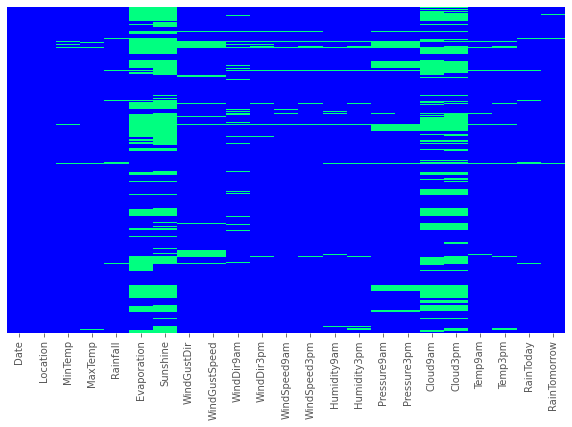

In [9]:
# using heatmap we can also vizualize the null values !
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='winter',yticklabels=False,cbar=False)
plt.show()

In [10]:
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date'],axis=1,inplace=True)

In [11]:
# Filling null values

def fill_na(info):
    cols=info.columns
    for col in cols:
        if info[col].dtype=='object':
            info[col].fillna(method='ffill',inplace=True)
        else:
            info[col].fillna(info[col].median(),inplace=True)
    return info

In [12]:
df1=fill_na(df)

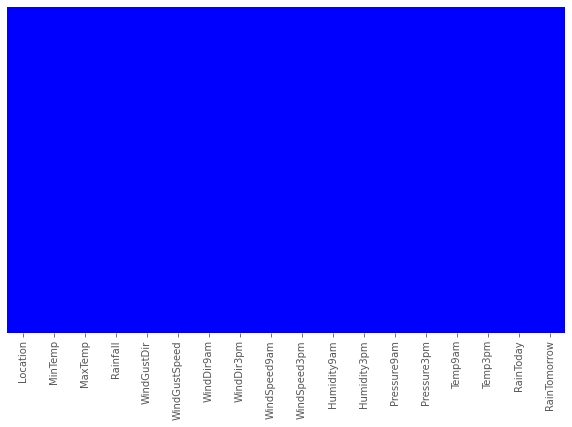

In [13]:
# Now check the null values using heatmap ! 
plt.figure(figsize=(10,6))
sns.heatmap(df1.isnull(),cmap='winter',yticklabels=False,cbar=False)
plt.show()

In [14]:
df1.shape

(145460, 18)

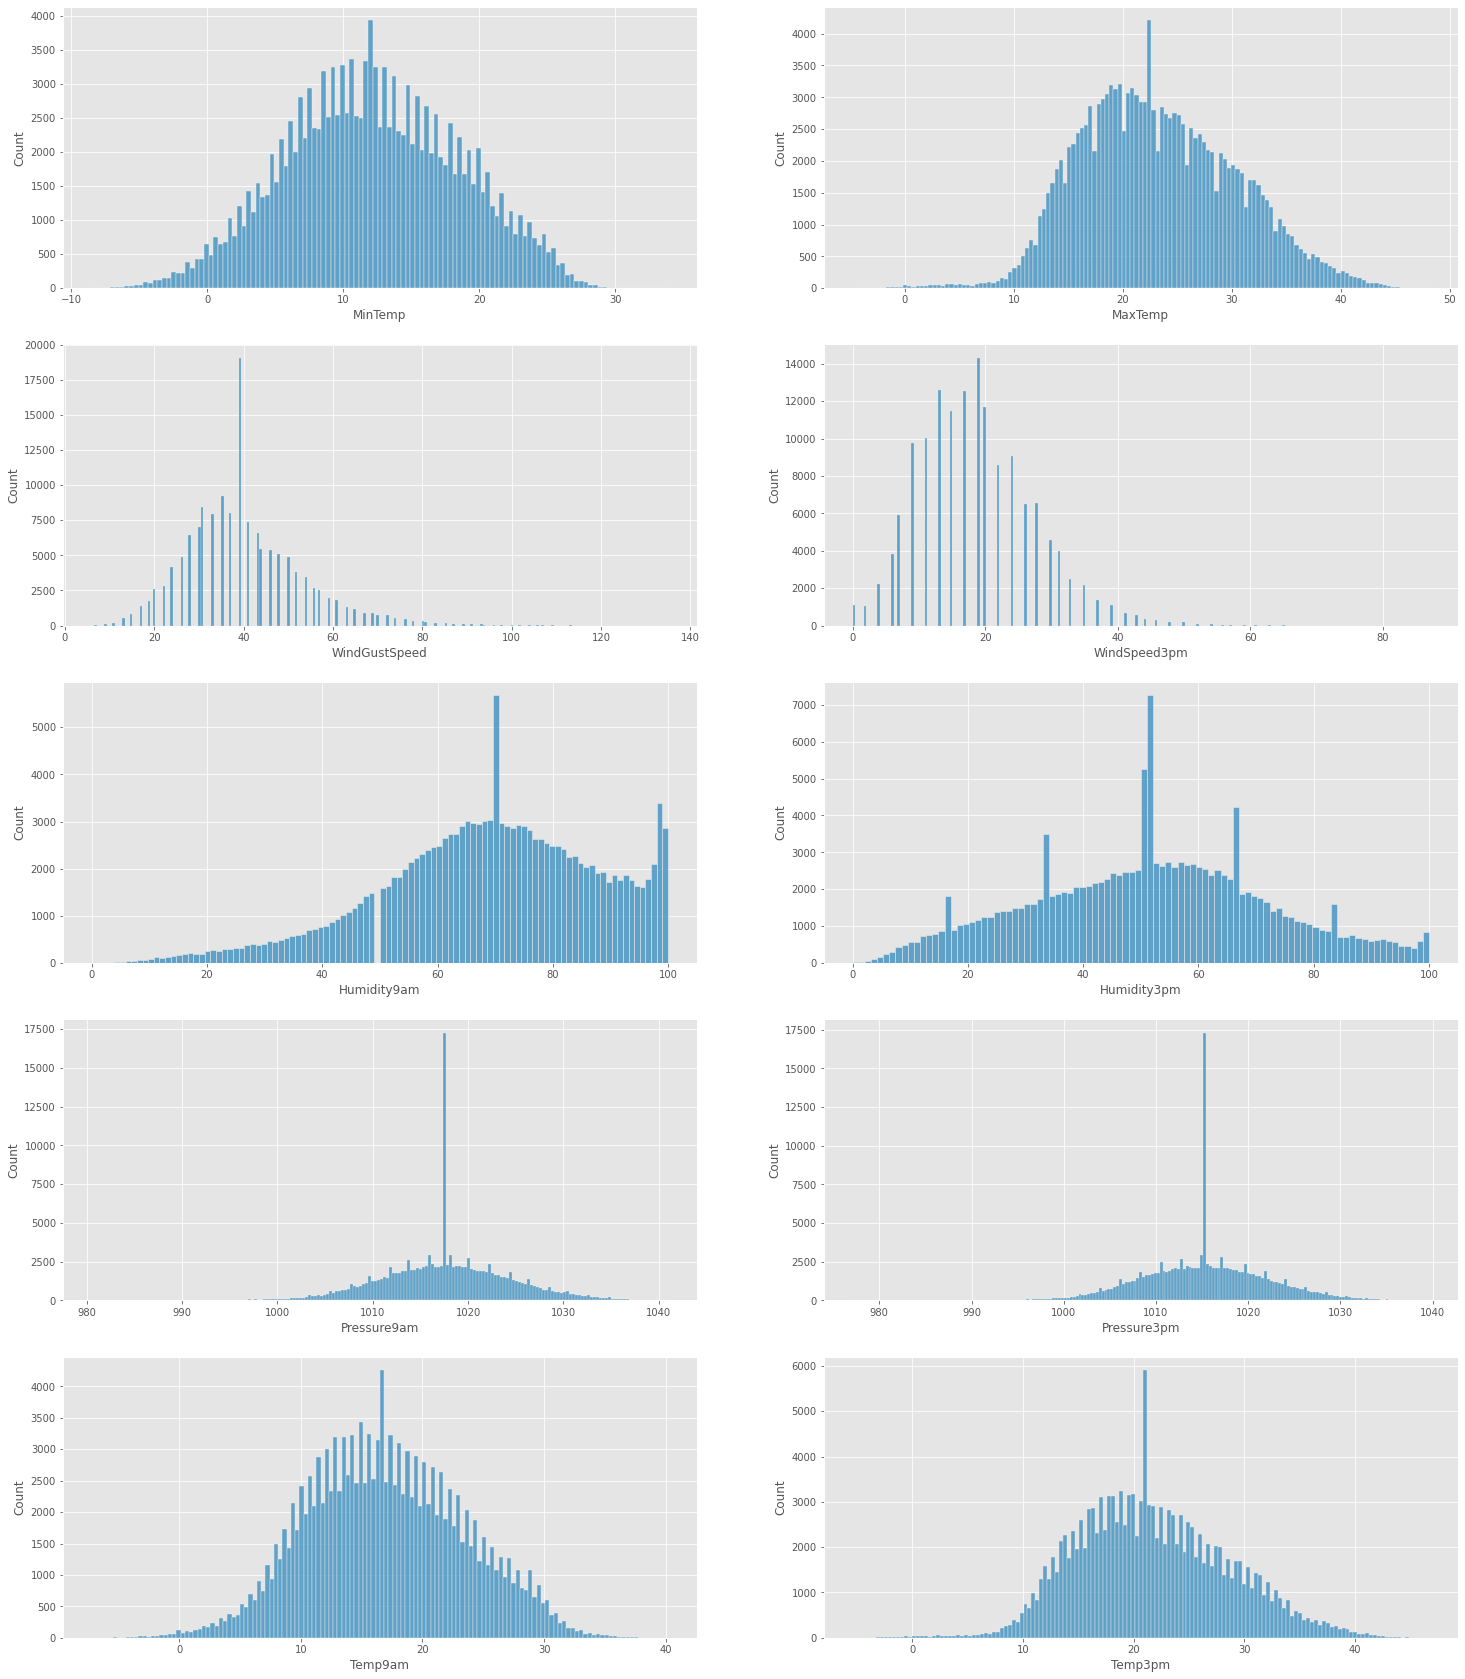

In [15]:
plt.figure(figsize=(25,30))
plt.subplot(5,2,1)
sns.histplot(df1,x='MinTemp')
plt.subplot(5,2,2)
sns.histplot(df1,x='MaxTemp')
plt.subplot(5,2,3)
sns.histplot(df1,x='WindGustSpeed')
plt.subplot(5,2,4)
sns.histplot(df1,x='WindSpeed3pm')
plt.subplot(5,2,5)
sns.histplot(df1,x='Humidity9am')
plt.subplot(5,2,6)
sns.histplot(df1,x='Humidity3pm')
plt.subplot(5,2,7)
sns.histplot(df1,x='Pressure9am')
plt.subplot(5,2,8)
sns.histplot(df1,x='Pressure3pm')
plt.subplot(5,2,9)
sns.histplot(df1,x='Temp9am')
plt.subplot(5,2,10)
sns.histplot(df1,x='Temp3pm')
plt.show()

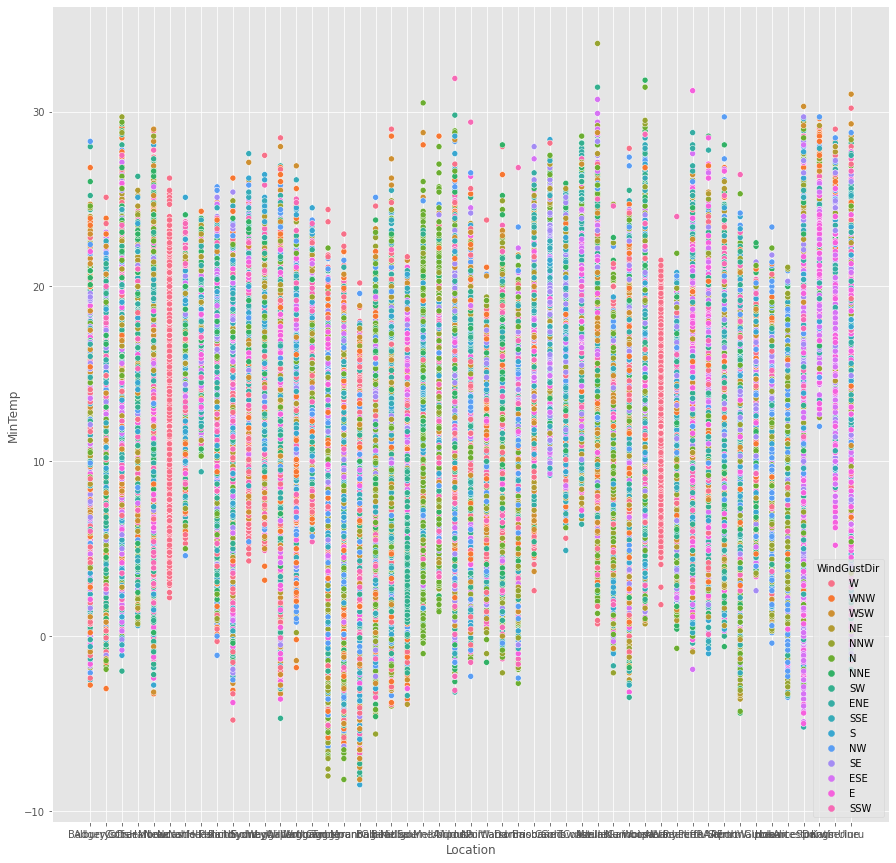

In [16]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df1, x="Location", y="MinTemp", hue="WindGustDir")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
cols = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)
df1.head(n=5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


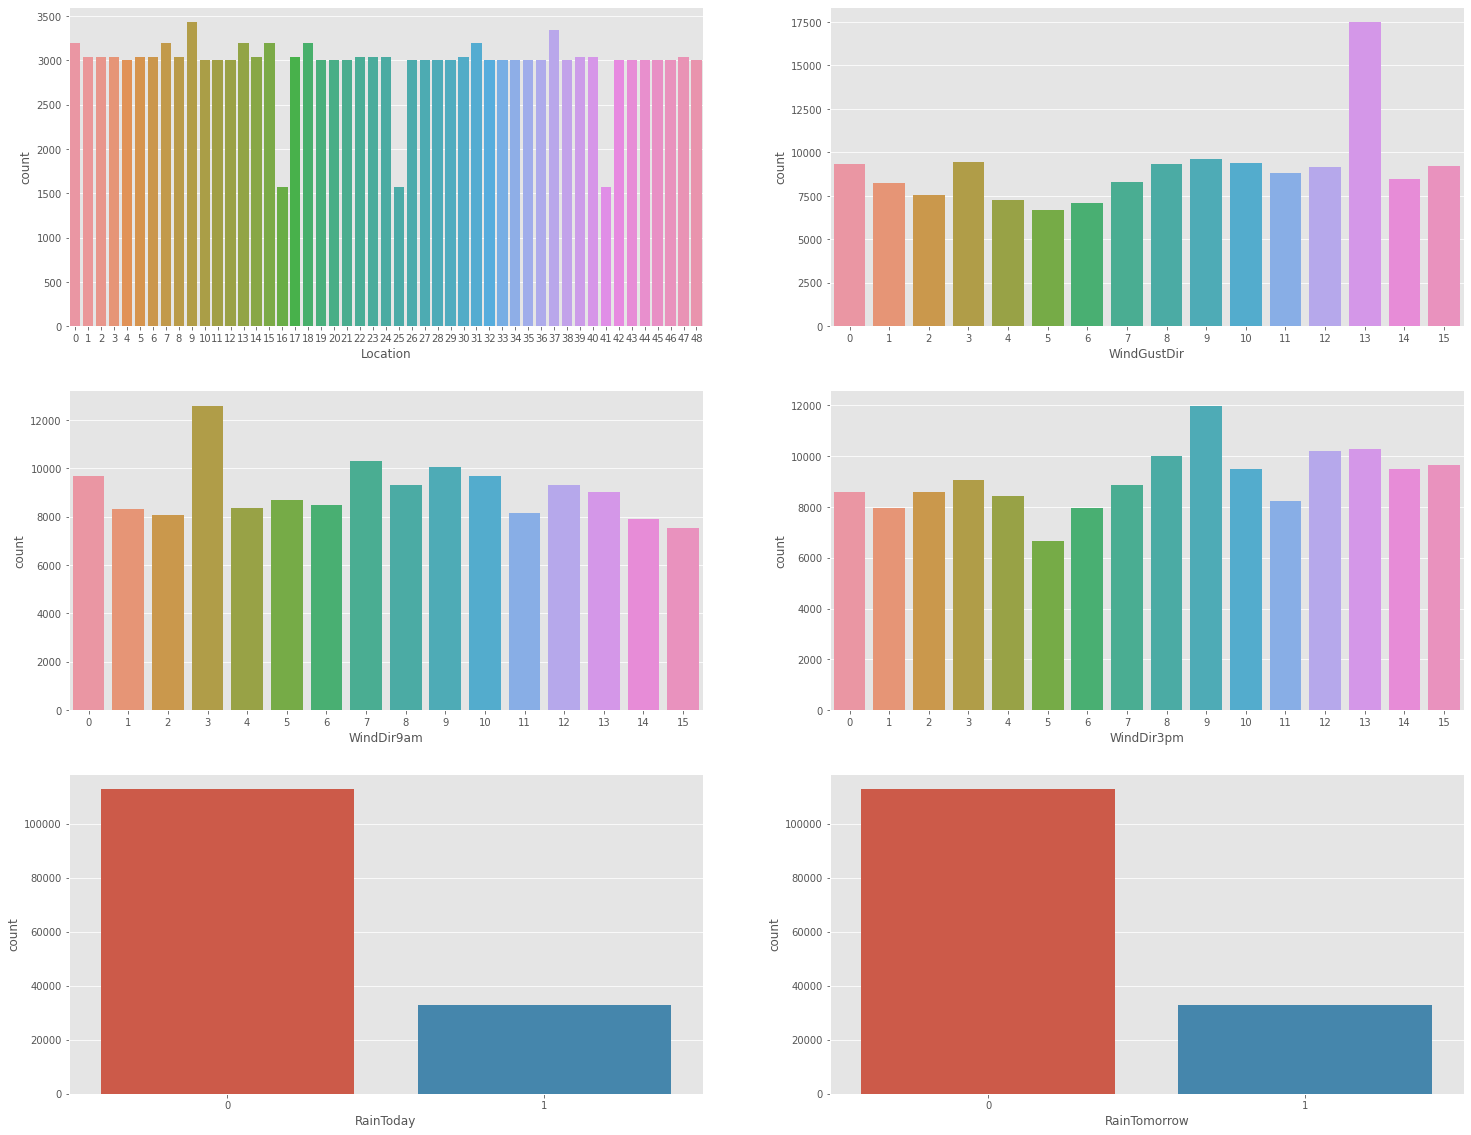

In [18]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
sns.countplot(data = df1,x = df1['Location'])
plt.subplot(3,2,2)
sns.countplot(data = df1,x=df1['WindGustDir'])
plt.subplot(3,2,3)
sns.countplot(data = df1,x=df1['WindDir9am'])
plt.subplot(3,2,4)
sns.countplot(data = df1,x = df1['WindDir3pm'])
plt.subplot(3,2,5)
sns.countplot(data = df1,x=df1['RainToday'])
plt.subplot(3,2,6)
sns.countplot(data = df1,x=df1['RainTomorrow'])
plt.show()

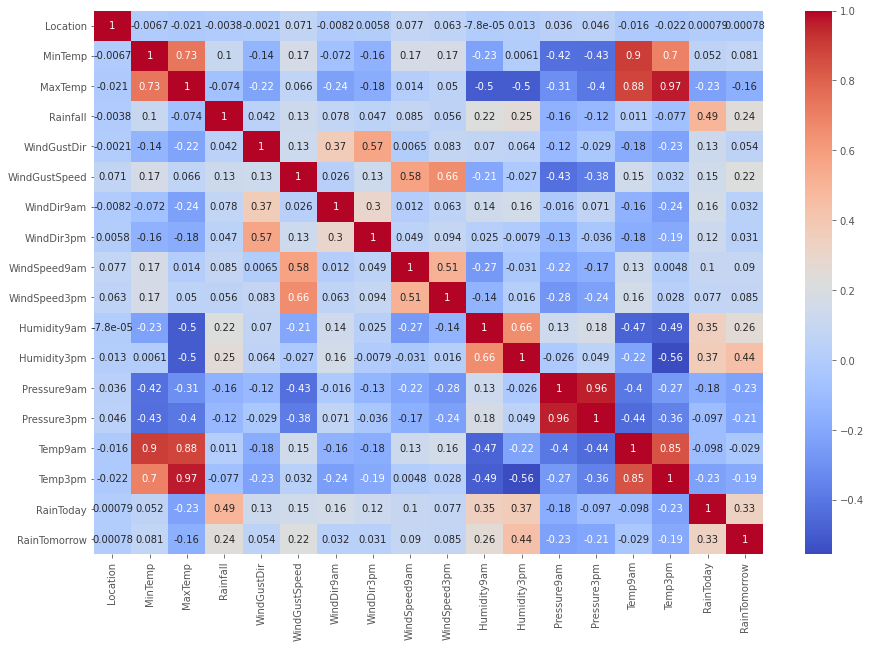

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.show()

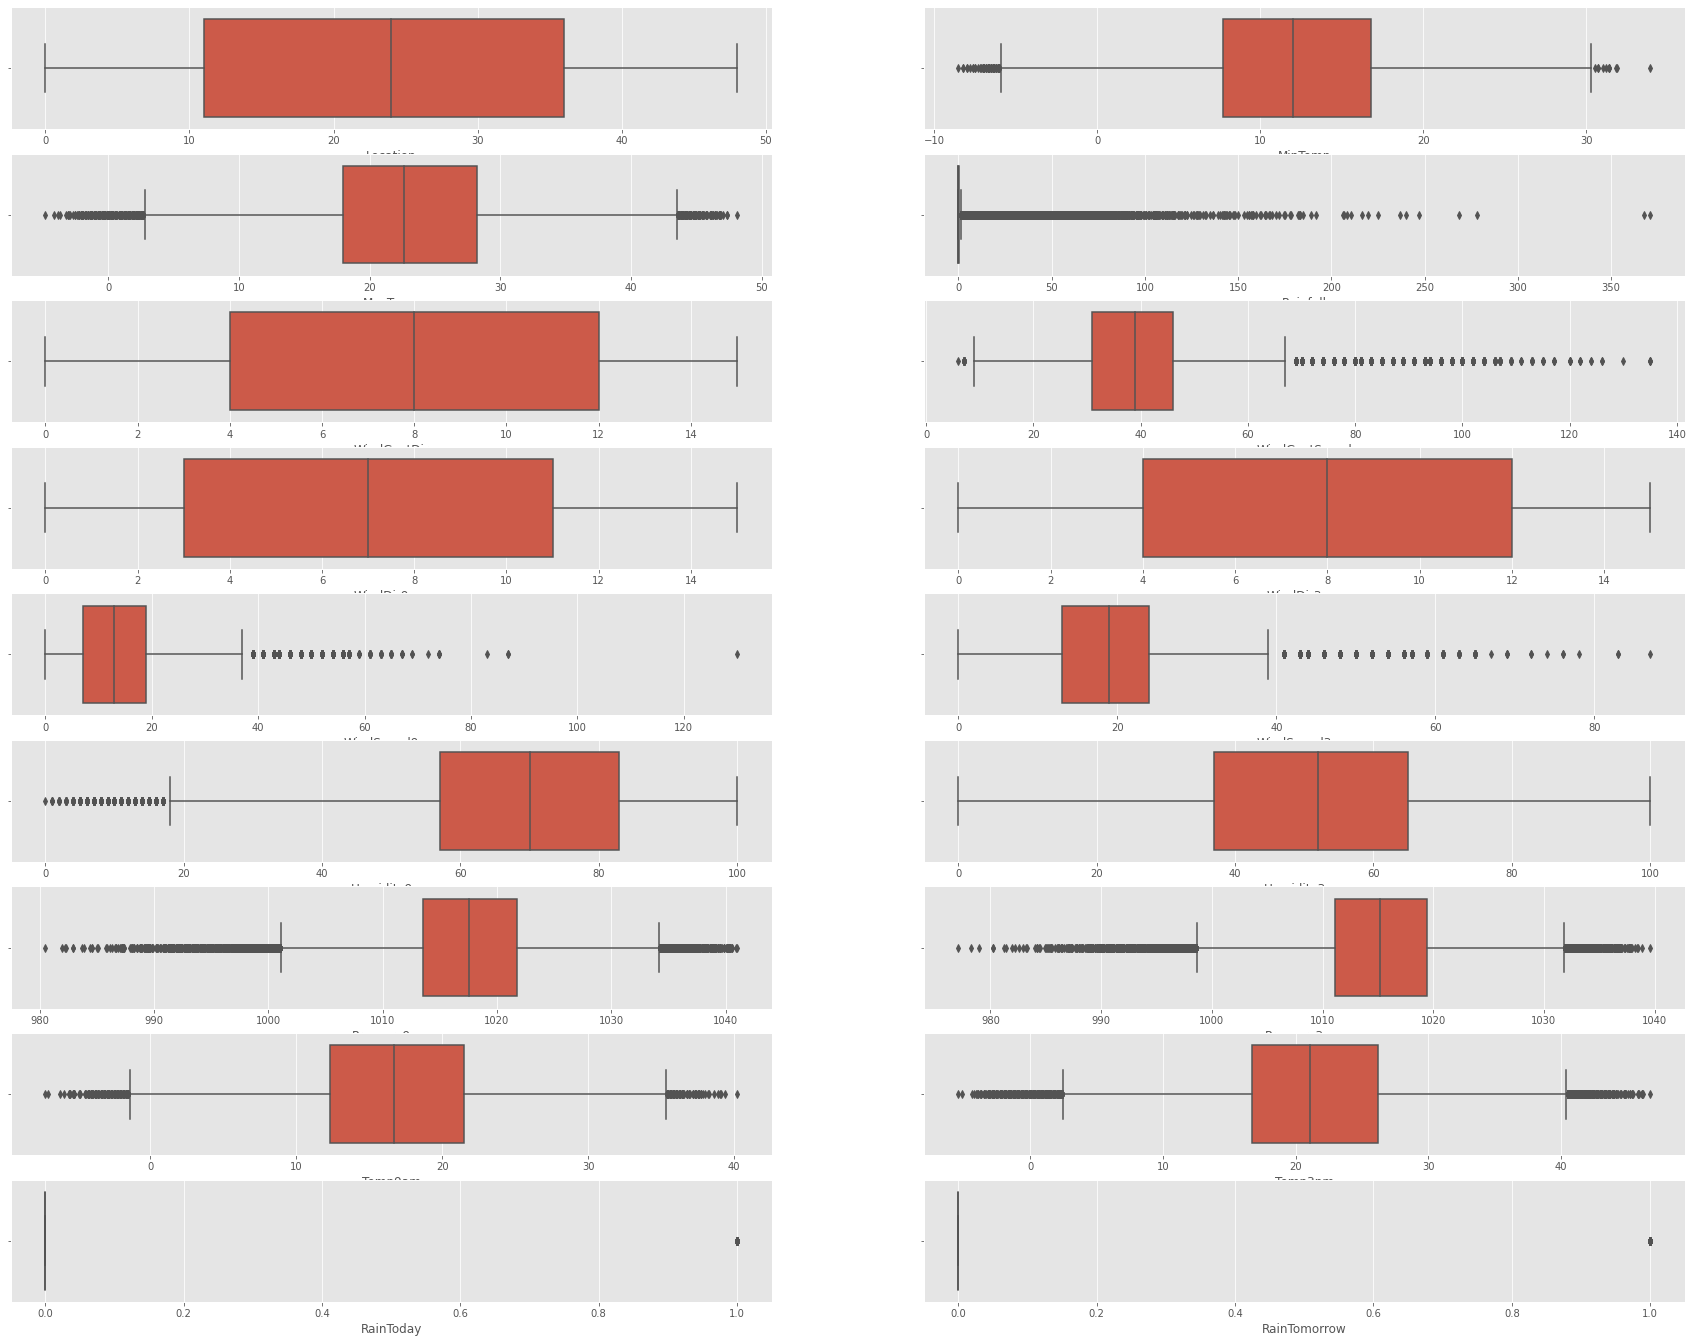

In [20]:
plt.figure(figsize=(30,40))
for i,col in enumerate(df1.columns,1):
    plt.subplot(15,2,i)
    sns.boxplot(data=df1,x=col, orient="h")
plt.show()

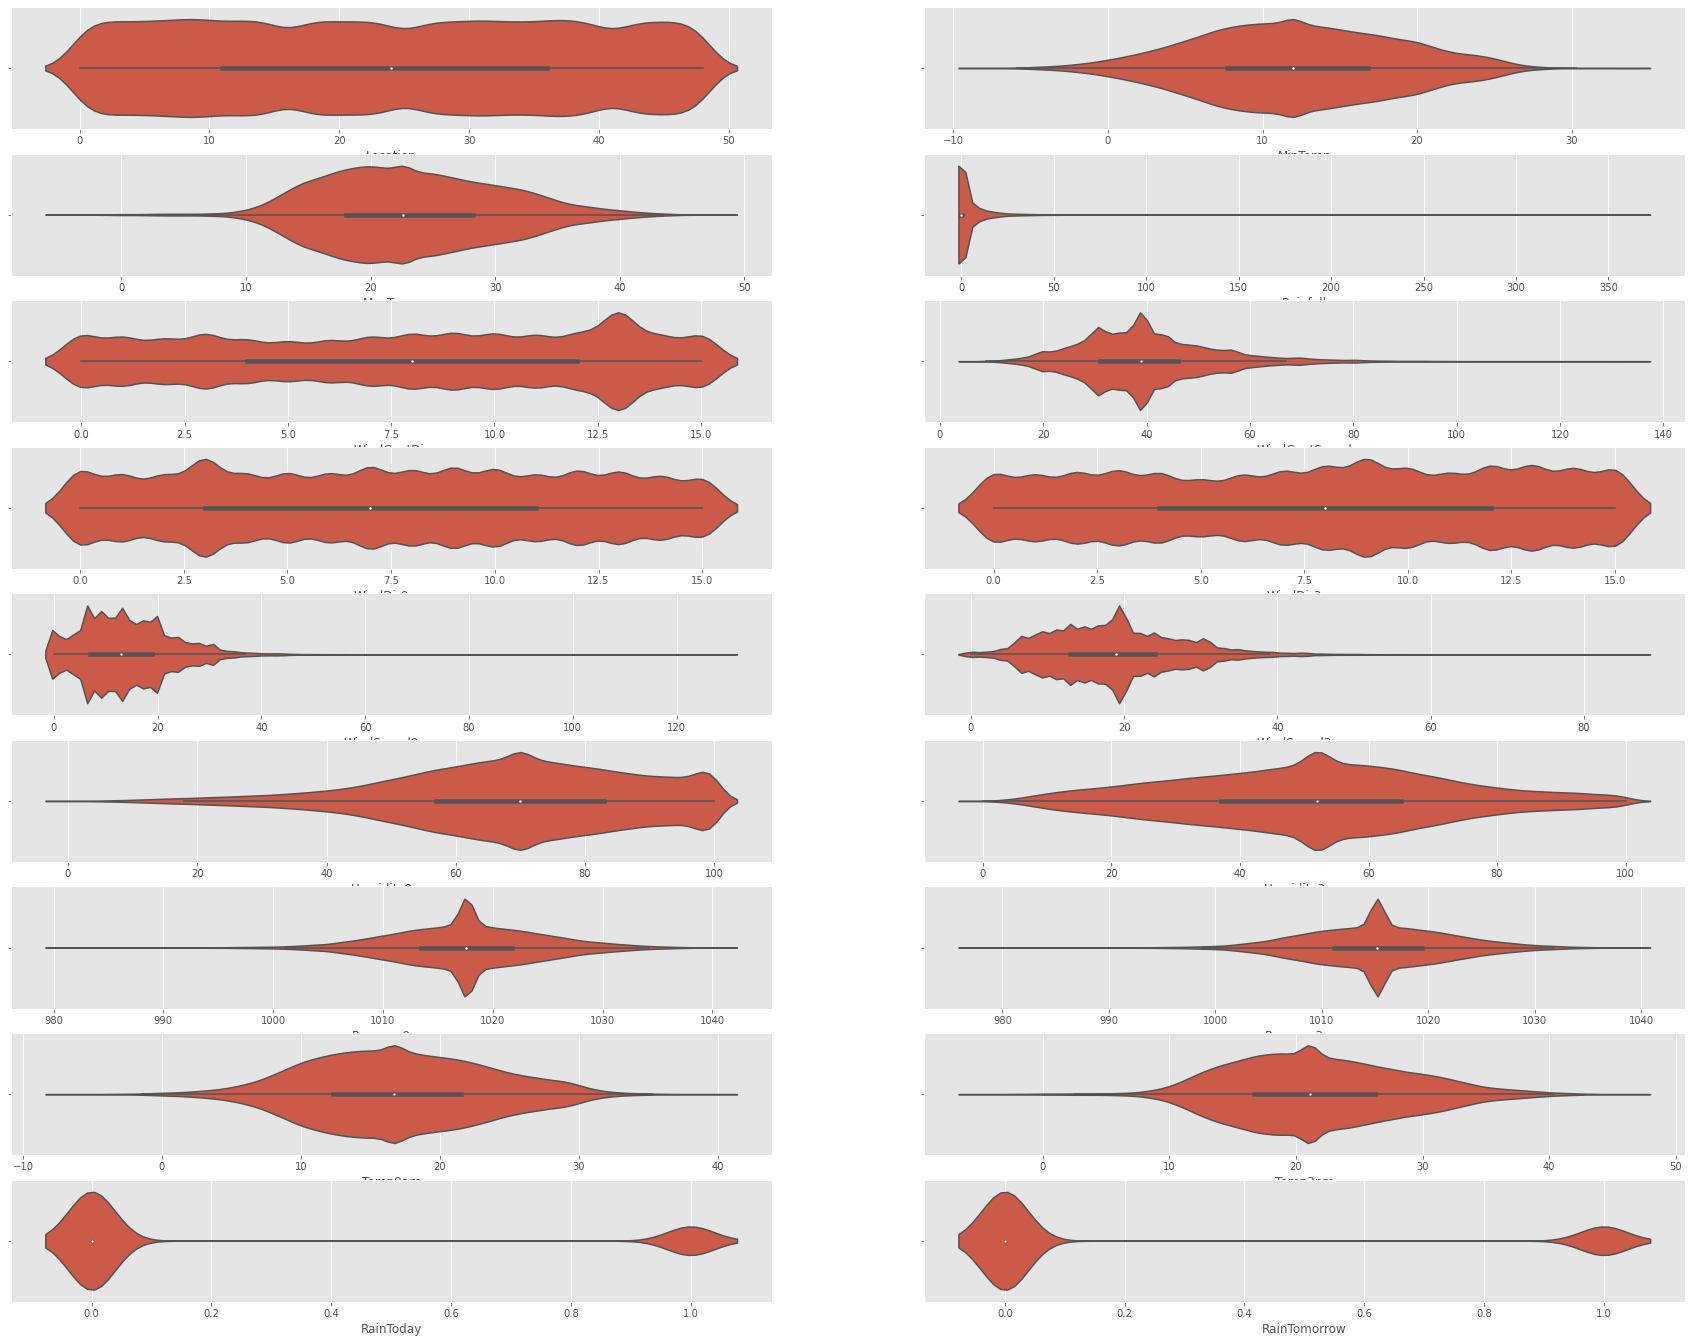

In [21]:
plt.figure(figsize=(30,40))
for i,column in enumerate(df1.columns,1):
    plt.subplot(15,2,i)
    sns.violinplot(data = df1,x = df1[column],orient = 'h')
plt.show()

In [22]:
zscore = np.abs(stats.zscore(df1))
print(zscore)

[[1.53166617 0.18975691 0.0445749  ... 0.0191346  0.53917171 0.53913985]
 [1.53166617 0.75278601 0.26579424 ... 0.3840643  0.53917171 0.53913985]
 [1.53166617 0.11121166 0.35044037 ... 0.22349523 0.53917171 0.53913985]
 ...
 [1.20928479 1.06696699 0.51973264 ... 0.64681369 0.53917171 0.53913985]
 [1.20928479 0.68994982 0.53384032 ... 0.6322165  0.53917171 0.53913985]
 [1.20928479 0.42539264 0.08689797 ... 0.11224009 0.53917171 0.53913985]]


In [23]:
print(np.where(zscore > 3))
df2 = df1[(zscore<3).all(axis=1)]

(array([     8,     12,     12, ..., 145279, 145279, 145393]), array([ 5, 12, 13, ...,  3, 13,  3]))


In [24]:
df1.shape,df2.shape

((145460, 18), (138208, 18))

## Data Processing

In [25]:
X = df2.drop(['RainToday','RainTomorrow','Temp3pm','Temp9am'],axis=True)
y = df2['RainTomorrow']

In [26]:
X = X.values
y = y.values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =42)

In [28]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(103656, 14) (103656,)
(34552, 14) (34552,)


In [29]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train-X_mean)/X_std

X_test = (X_test-X_mean)/X_std

In [30]:
# Calculate accuracy percentage between two lists
def accuracy_score(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [31]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, X_train, X_test, y_train, y_test, y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')

# Modeling
Our first model is going to be Decision Trees

## Decision Tree Classifier

Confusion Matrix
-----------------------------------------------------


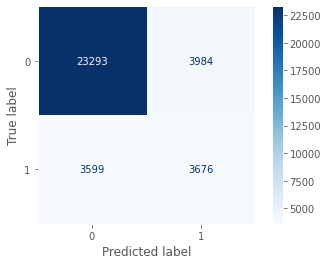



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     27277
           1       0.48      0.51      0.49      7275

    accuracy                           0.78     34552
   macro avg       0.67      0.68      0.68     34552
weighted avg       0.78      0.78      0.78     34552



ROC Curve
-----------------------------------------------------


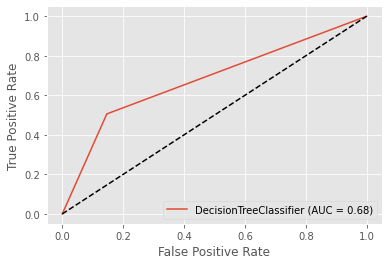



Checking model fitness
-----------------------------------------------------
Train score: 0.9999
Test score:  0.7805




In [32]:
d_clf = DecisionTreeClassifier()
d_clf.fit(X_train,y_train)

y_pred = d_clf.predict(X_test)

evaluate(d_clf, X_train, X_test, y_train, y_test, y_pred)

## Random Forest Classifier

Confusion Matrix
-----------------------------------------------------


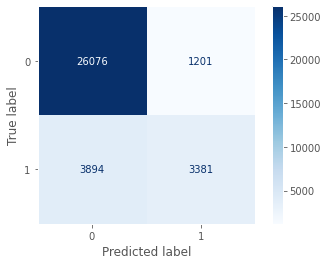



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     27277
           1       0.74      0.46      0.57      7275

    accuracy                           0.85     34552
   macro avg       0.80      0.71      0.74     34552
weighted avg       0.84      0.85      0.84     34552



ROC Curve
-----------------------------------------------------


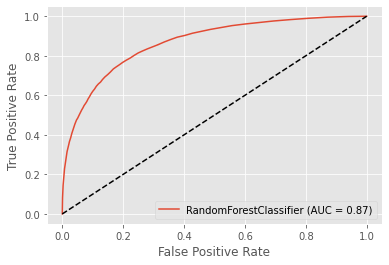



Checking model fitness
-----------------------------------------------------
Train score: 0.9999
Test score:  0.8525




In [33]:
r_clf = RandomForestClassifier()
r_clf.fit(X_train,y_train)

y_pred = r_clf.predict(X_test)

evaluate(r_clf, X_train, X_test, y_train, y_test, y_pred)

## LightGBM

Confusion Matrix
-----------------------------------------------------


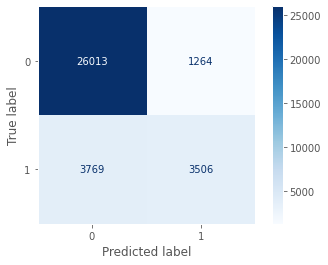



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     27277
           1       0.74      0.48      0.58      7275

    accuracy                           0.85     34552
   macro avg       0.80      0.72      0.75     34552
weighted avg       0.84      0.85      0.84     34552



ROC Curve
-----------------------------------------------------


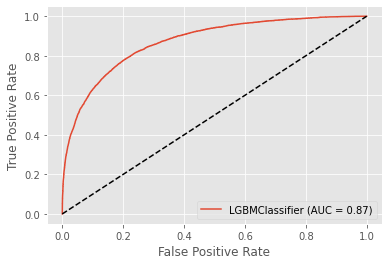



Checking model fitness
-----------------------------------------------------
Train score: 0.8641
Test score:  0.8543




In [34]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_test)

evaluate(lgb, X_train, X_test, y_train, y_test, y_pred)

## GBM

Confusion Matrix
-----------------------------------------------------


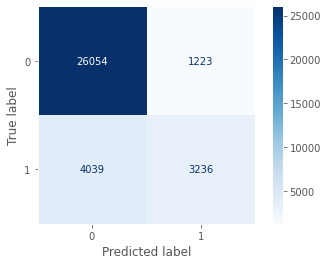



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     27277
           1       0.73      0.44      0.55      7275

    accuracy                           0.85     34552
   macro avg       0.80      0.70      0.73     34552
weighted avg       0.84      0.85      0.83     34552



ROC Curve
-----------------------------------------------------


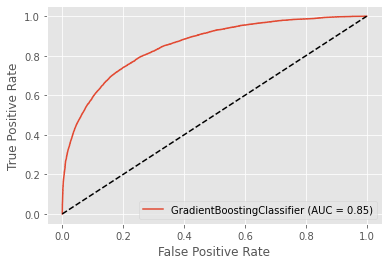



Checking model fitness
-----------------------------------------------------
Train score: 0.8508
Test score:  0.8477




In [35]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)

y_pred = gb_clf.predict(X_test)

evaluate(gb_clf, X_train, X_test, y_train, y_test, y_pred)

## XGBoost

[22:36:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
-----------------------------------------------------


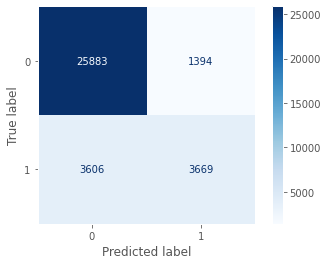



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27277
           1       0.72      0.50      0.59      7275

    accuracy                           0.86     34552
   macro avg       0.80      0.73      0.75     34552
weighted avg       0.85      0.86      0.85     34552



ROC Curve
-----------------------------------------------------


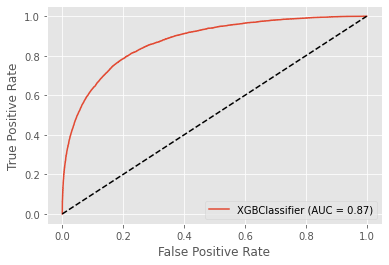



Checking model fitness
-----------------------------------------------------
Train score: 0.8858
Test score:  0.8553




In [36]:
x_clf = XGBClassifier()
x_clf.fit(X_train,y_train)

y_pred = x_clf.predict(X_test)
evaluate(x_clf, X_train, X_test, y_train, y_test, y_pred)

## Cat Boost

Learning rate set to 0.074747
0:	learn: 0.6407858	total: 92.7ms	remaining: 1m 32s
1:	learn: 0.5967791	total: 129ms	remaining: 1m 4s
2:	learn: 0.5603710	total: 164ms	remaining: 54.6s
3:	learn: 0.5308112	total: 200ms	remaining: 49.8s
4:	learn: 0.5066384	total: 240ms	remaining: 47.7s
5:	learn: 0.4858741	total: 274ms	remaining: 45.3s
6:	learn: 0.4684173	total: 308ms	remaining: 43.6s
7:	learn: 0.4540156	total: 347ms	remaining: 43s
8:	learn: 0.4431072	total: 382ms	remaining: 42.1s
9:	learn: 0.4332045	total: 423ms	remaining: 41.8s
10:	learn: 0.4249655	total: 460ms	remaining: 41.3s
11:	learn: 0.4178932	total: 494ms	remaining: 40.7s
12:	learn: 0.4116602	total: 534ms	remaining: 40.5s
13:	learn: 0.4066288	total: 570ms	remaining: 40.1s
14:	learn: 0.4023471	total: 606ms	remaining: 39.8s
15:	learn: 0.3982819	total: 649ms	remaining: 39.9s
16:	learn: 0.3945896	total: 685ms	remaining: 39.6s
17:	learn: 0.3913290	total: 720ms	remaining: 39.3s
18:	learn: 0.3887532	total: 761ms	remaining: 39.3s
19:	learn: 

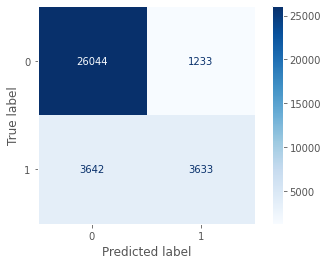



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27277
           1       0.75      0.50      0.60      7275

    accuracy                           0.86     34552
   macro avg       0.81      0.73      0.76     34552
weighted avg       0.85      0.86      0.85     34552



ROC Curve
-----------------------------------------------------


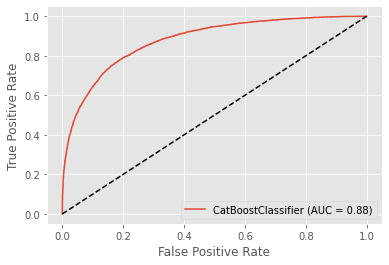



Checking model fitness
-----------------------------------------------------
Train score: 0.8843
Test score:  0.8589




In [37]:
cat = CatBoostClassifier()

cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

evaluate(cat, X_train, X_test, y_train, y_test, y_pred)